In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
data=pd.read_csv('sampleData.csv')
data.head()

,employeeRating,Salary,age
0,1.1,39300,21
1,1.3,46200,31
2,1.5,37730,29
3,2.0,43525,30
4,2.2,39890,27


In [4]:
data.drop(['age'],axis=1,inplace=True)

In [5]:
data.head()

,employeeRating,Salary
0,1.1,39300
1,1.3,46200
2,1.5,37730
3,2.0,43525
4,2.2,39890


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   employeeRating  30 non-null     float64
 1   Salary          30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employeeRating,30.0,5.313333,2.837888,1.1,3.2,4.7,7.70,10.5
Salary,30.0,75992.766667,27422.748727,37730.0,56705.0,65237.0,100544.75,122391.0


In [8]:
data.isnull().sum()

employeeRating    0
Salary            0
dtype: int64

In [9]:
data.corr()

,employeeRating,Salary
employeeRating,1.000000,0.978213
Salary,0.978213,1.000000


<AxesSubplot:>

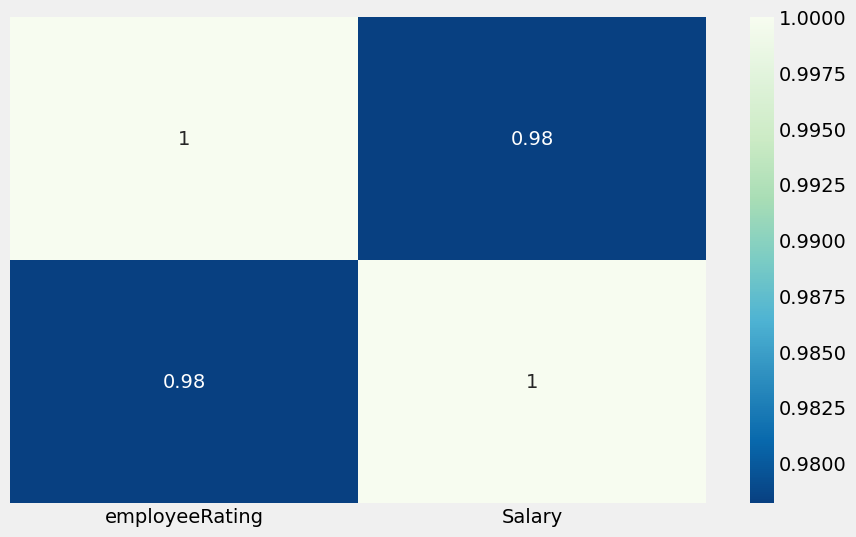

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),yticklabels=False,annot=True,cmap='GnBu_r')

<Figure size 1000x600 with 0 Axes>

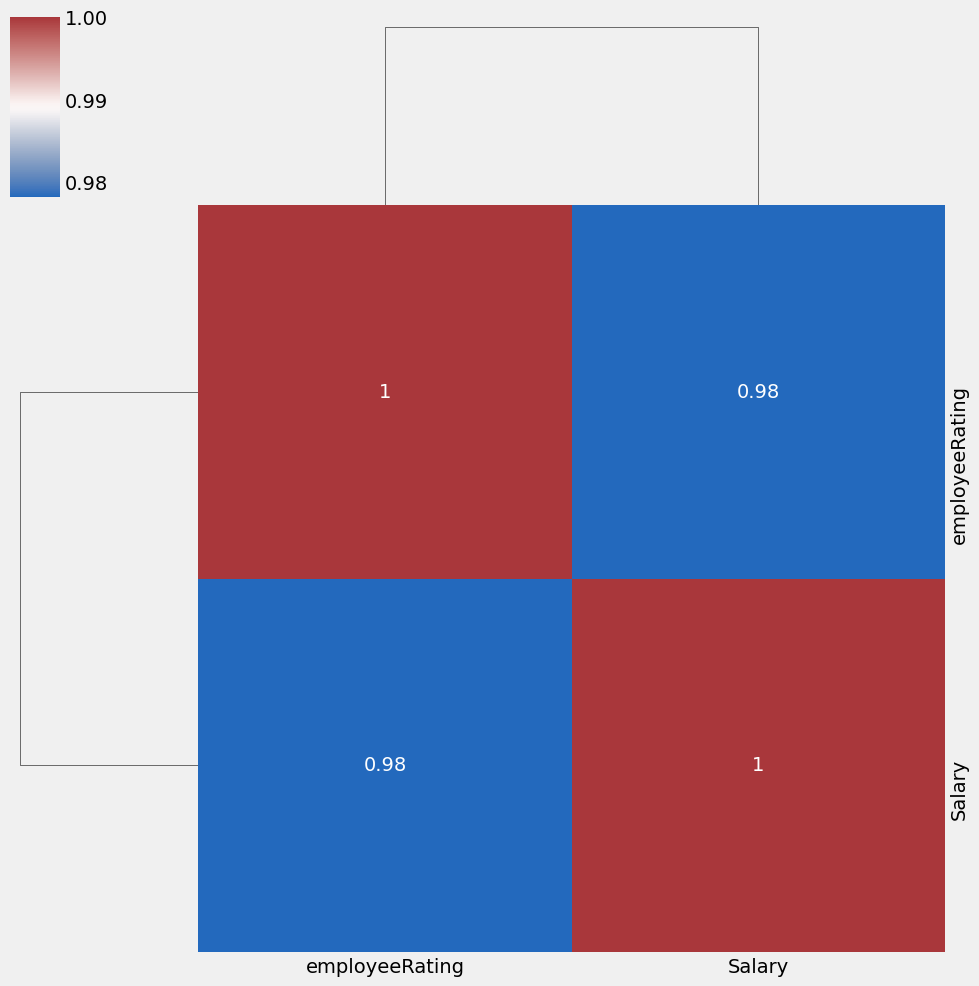

In [11]:
plt.figure(figsize=(10,6))
sns.clustermap(data.corr(),cmap='vlag',annot=True)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

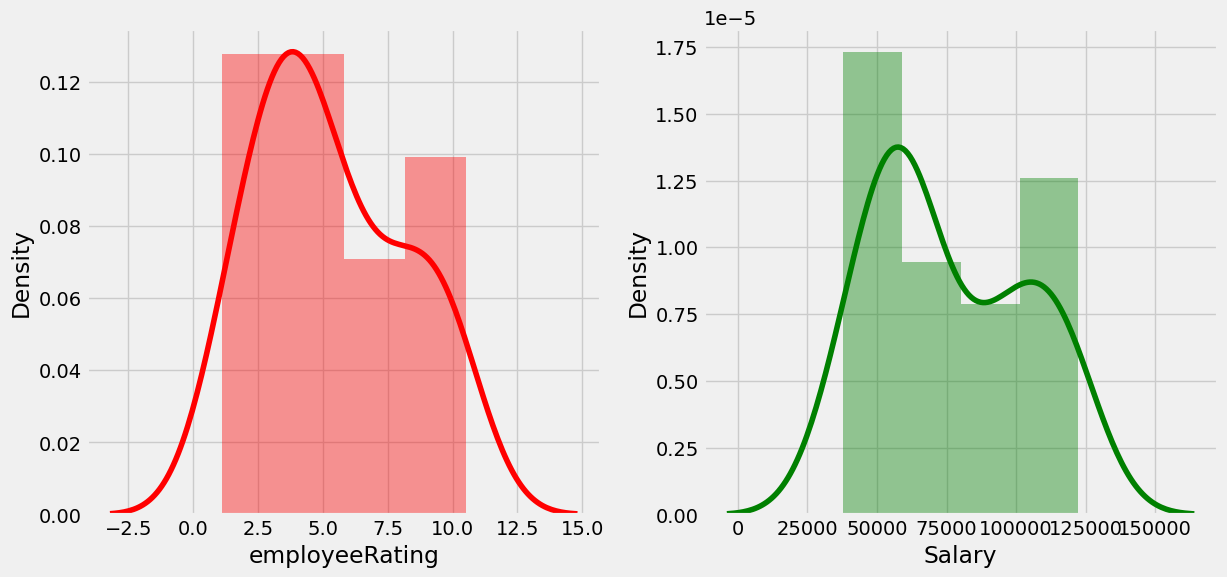

In [12]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.distplot(data['employeeRating'],color='r')
plt.subplot(122)
sns.distplot(data['Salary'],color='g')

<AxesSubplot:>

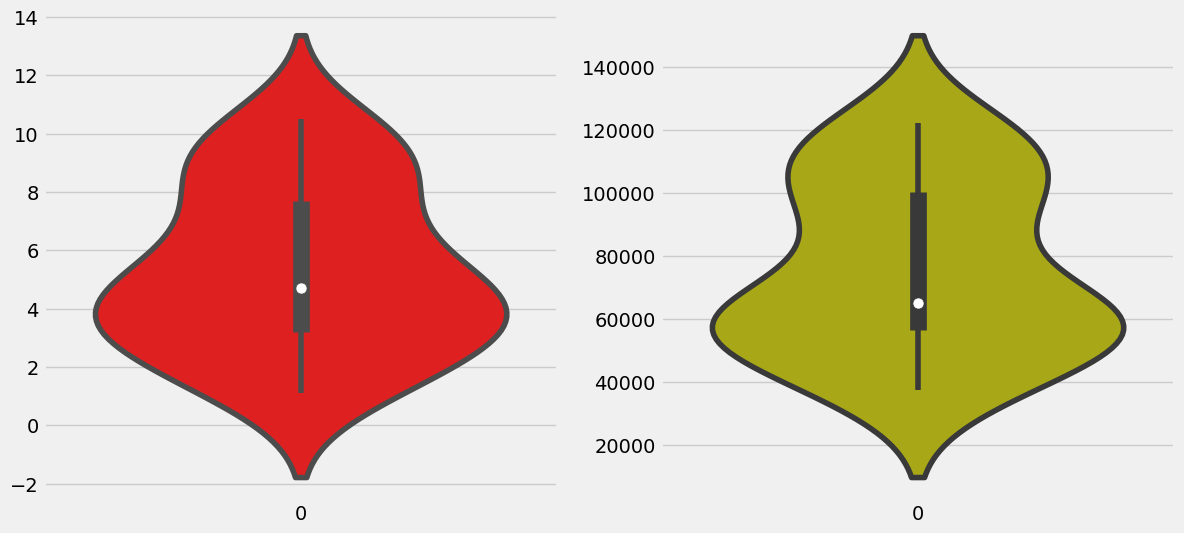

In [13]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(data['employeeRating'],color='r')
plt.subplot(122)
sns.violinplot(data['Salary'],color='y')

<AxesSubplot:xlabel='Salary', ylabel='employeeRating'>

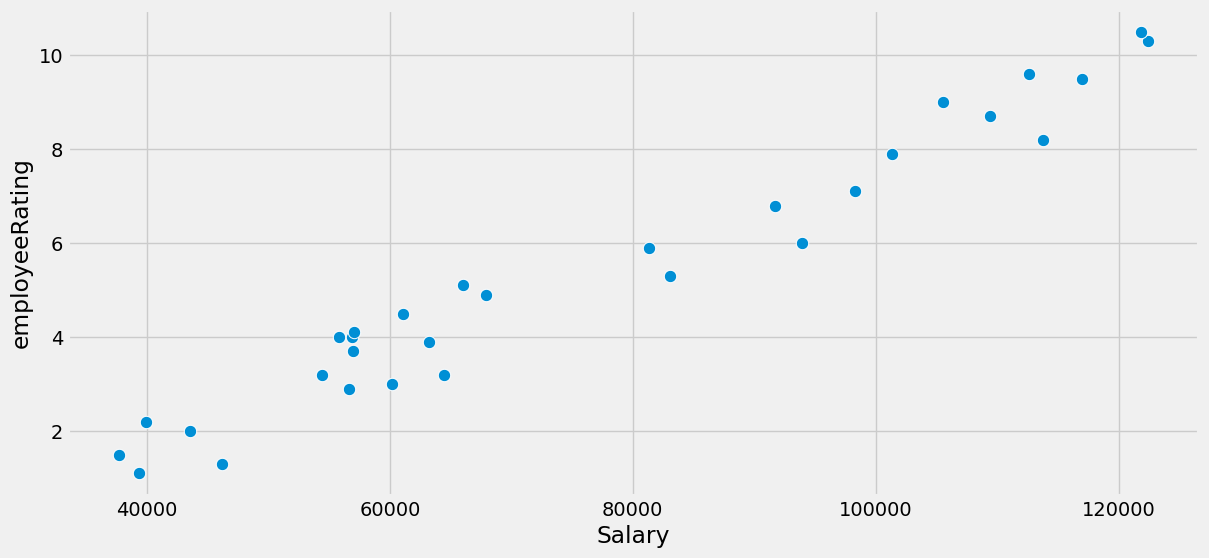

In [14]:
plt.figure(figsize=(13,6))
sns.scatterplot(x='Salary',y='employeeRating',data=data,s=80)

<Figure size 1300x600 with 0 Axes>

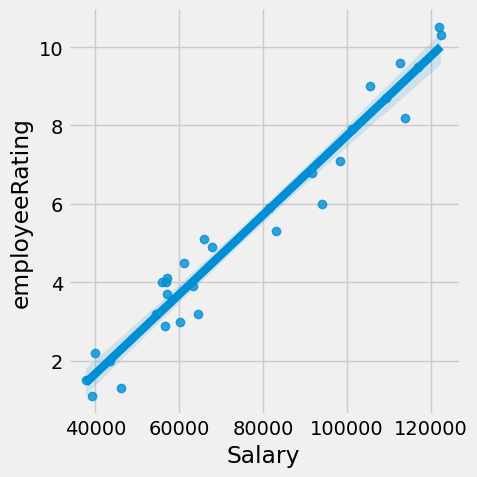

In [15]:
plt.figure(figsize=(13,6))
sns.lmplot(x='Salary',y='employeeRating',data=data)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=np.array(data['Salary'])
y=np.array(data['employeeRating'])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32)

In [19]:
a=x_train-x_train.mean()
c=y_train-y_train.mean()
d=sum(a*c)
e=sum(a*a)
m=d/e
b=y_train.mean()-m*x_train.mean()
print(f"slope is {m}")
print(f"bias is {b}")

slope is 9.897106835972128e-05
bias is -2.2658053814766115


In [20]:
y_pred=m*x_test+b

In [21]:
print(y_pred)
print(y_test)

[1.62375761 3.3834632  3.68730438 3.36564841 7.46037842 4.45809106
 9.79599666 8.18375796]
[ 1.1  4.1  3.   4.   7.1  4.9 10.5  9. ]


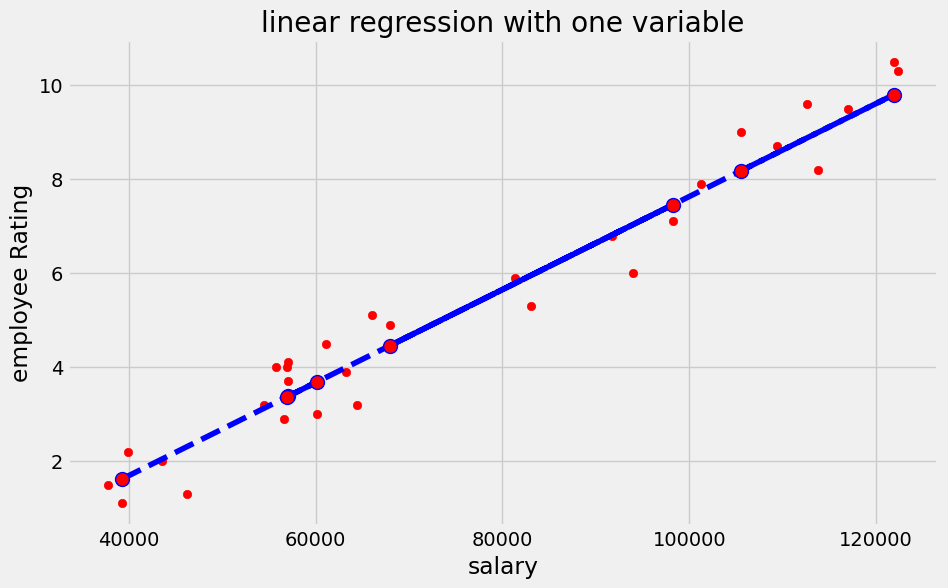

In [22]:
plt.figure(figsize=(10,6))
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("salary")
plt.ylabel("employee Rating")
plt.title("linear regression with one variable")
plt.show()

In [23]:
from sklearn.metrics import explained_variance_score

In [24]:
explained_variance_score(y_test,y_pred)*100

96.04105984979996